# Ejercicios de ejemplo

El ﬁchero `titanic_es.csv` contiene información sobre aproximadamente el 80% de los pasajeros del Titanic1.
Las variables incluidas en el ﬁchero son:
* `clase`: clase en la que viajaba el pasajero (primera = Primera clase; segunda = Segunda clase; tercera =
Tercera clase).
* `sobreviviente`: indica si cada pasajero sobrevivió o no al naufragio (0 = No; 1 = Sí).
* `sexo`: (hombre o mujer).
* `edad`: edad en años (los menores de un año se representan con un número menor uno).
* `tarifa`: precio del billete en libras.
* `embarque`: puerto en el que se realizó el embarque (Cherbourg, Queenstown o Southampton).

Importa los datos en R y almacena el contenido en un objeto de nombre titanic. 

In [1]:
Sys.setlocale("LC_ALL", "es_ES.UTF-8")  # Para que los acentos se muestren correctamente 

library(ggplot2)


titanic <- read.csv("titanic_es.csv", sep=";", dec=",", fileEncoding = "UTF-8")
head(titanic)

[1] "es_ES.UTF-8/es_ES.UTF-8/es_ES.UTF-8/C/es_ES.UTF-8/C"

,clase,sobreviviente,sexo,edad,tarifa,embarque
,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
1,primera,1,mujer,29.0000,211.3375,Southampton
2,primera,1,hombre,0.9167,151.5500,Southampton
3,primera,0,mujer,2.0000,151.5500,Southampton
4,primera,0,hombre,30.0000,151.5500,Southampton
5,primera,0,mujer,25.0000,151.5500,Southampton
6,primera,1,hombre,48.0000,26.5500,Southampton


Contesta a las siguientes preguntas utilizando R:
1. ¿Cuántos pasajeros aparecen registrados en el conjunto de datos?

In [2]:
num_pasajeros <- nrow(titanic)
cat("Número de pasajeros:", num_pasajeros)

Número de pasajeros: 1043

2. ¿Cuántos pasajeros sobrevivieron al naufragio?

In [3]:
num_sobrevivientes <- sum(titanic$sobreviviente == 1)
cat("Número de pasajeros que sobrevivieron:", num_sobrevivientes, "\n")

Número de pasajeros que sobrevivieron: 425 


3. Calcula el porcentaje de pasajeros que sobrevivió al naufragio.

In [4]:
porcentaje_sobrevivientes <- (num_sobrevivientes / num_pasajeros) * 100
cat("Porcentaje de pasajeros que sobrevivieron:", porcentaje_sobrevivientes, "%\n")

Porcentaje de pasajeros que sobrevivieron: 40.74784 %


4. ¿Cuántos pasajeros viajaban en primera clase?

In [5]:
num_primera_clase <- sum(titanic$clase == "primera")
cat("Número de pasajeros que viajaban en primera clase:", num_primera_clase, "\n")

Número de pasajeros que viajaban en primera clase: 282 


5. ¿Cuántos niños (menores de 12 años) aparecen registrados?

In [6]:
num_ninos <- sum(titanic$edad < 12)
cat("Número de niños (menores de 12 años) registrados:", num_ninos, "\n")

Número de niños (menores de 12 años) registrados: 91 


6. Calcula las frecuencias relativas para las distintas clases de pasajeros.

In [7]:
num_pasajeros_clase <- table(titanic$clase)

# Calcular las frecuencias relativas
frecuencias_relativas <- num_pasajeros_clase / num_pasajeros

# Imprimir las frecuencias relativas
cat("Frecuencias relativas para las distintas clases de pasajeros:\n")
print(frecuencias_relativas)

Frecuencias relativas para las distintas clases de pasajeros:

  primera   segunda   tercera 
0.2703739 0.2502397 0.4793864 


7. Representa con un gráfico adecuado la distribución de las distintas clases de pasajeros. 

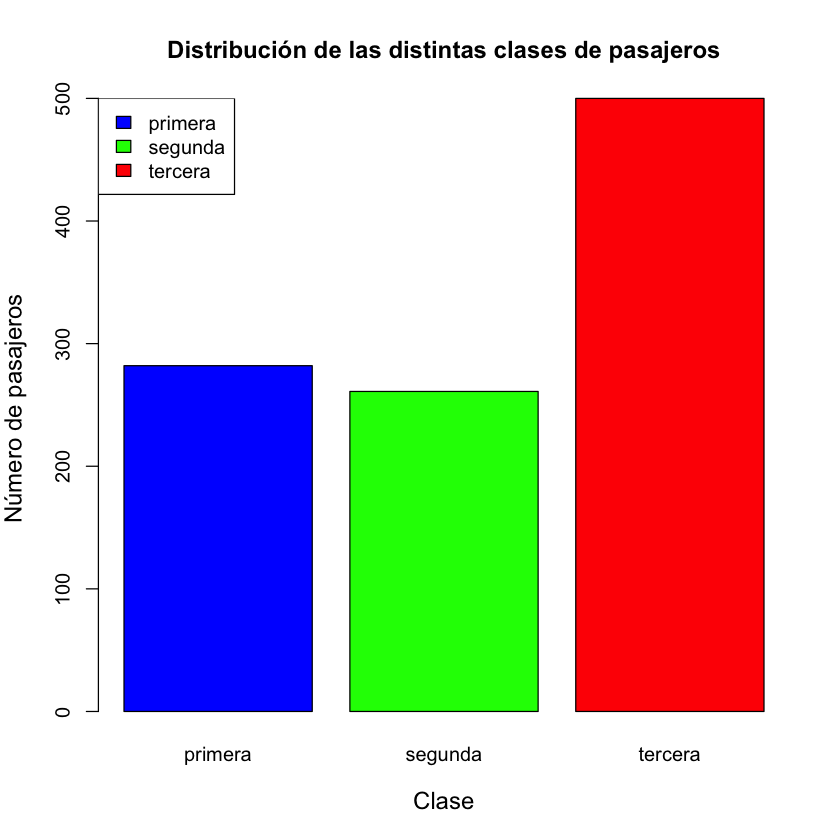

In [8]:
par(bg = "white")  # establecer el fondo blanco
barplot(num_pasajeros_clase, main = "Distribución de las distintas clases de pasajeros", 
        xlab = "Clase", ylab = "Número de pasajeros", col = c("blue", "green", "red"),
        cex.lab = 1.2, legend.text = FALSE)  # no mostrar la leyenda automáticamente

# Agregar la leyenda manualmente en la esquina superior derecha
legend("topleft", legend = names(num_pasajeros_clase), 
       fill = c("blue", "green", "red"))

8. Representa con un gráﬁco adecuado la distribución de la edad de los pasajeros registrados.

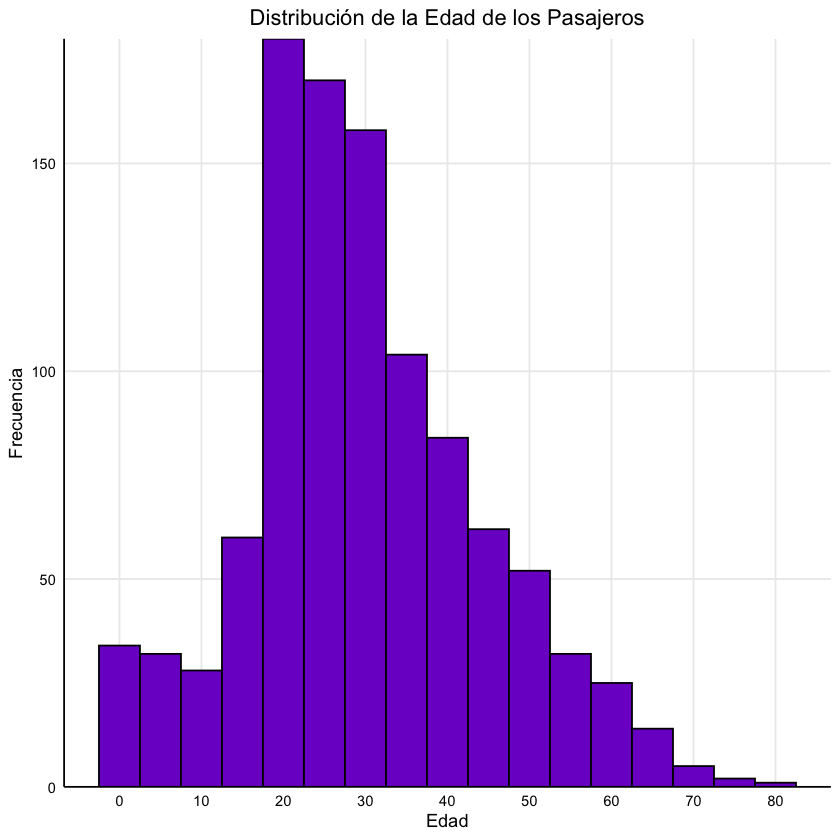

In [9]:
ggplot(titanic, aes(x = edad)) +
  geom_histogram(binwidth = 5, fill = "purple3", color = "black") +
  labs(title = "Distribución de la Edad de los Pasajeros", x = "Edad", y = "Frecuencia") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),  # Centrar el título
    panel.grid.minor = element_blank(),  # Quitar la cuadrícula menor
    axis.line = element_line(color = "black"),
    axis.text = element_text(color = "black"),  # Hacer los textos de los ejes más opacos
    axis.title = element_text(color = "black")  # Hacer los títulos de los ejes más opacos
  ) +
  scale_y_continuous(expand = c(0, 0)) +  # Quitar el espacio entre las barras y el eje x
  scale_x_continuous(breaks = seq(0, max(titanic$edad, na.rm = TRUE), by = 10))

9. ¿Cuál era la edad media de los pasajeros? ¿Y la mediana?

In [10]:
edad_media <- mean(titanic$edad, na.rm = TRUE)  # na.rm = TRUE para ignorar los valores NA 
edad_mediana <- median(titanic$edad, na.rm = TRUE)

cat("Edad media de los pasajeros:", edad_media, "\n")
cat("Edad mediana de los pasajeros:", edad_mediana, "\n")

Edad media de los pasajeros: 29.8132 
Edad mediana de los pasajeros: 28 


10. ¿Cuál era el precio medio de un pasaje en el Titanic?

In [11]:
precio_medio <- mean(titanic$tarifa, na.rm = TRUE)
cat("Precio medio de un pasaje en el Titanic:", precio_medio, "\n")

Precio medio de un pasaje en el Titanic: 36.60302 


11. La frase “Mujeres y niños primero” hace referencia a un protocolo histórico por el que las mujeres y los
niños debían ser los primeros en ser salvados en una emergencia. Según los datos, ¿qué porcentaje de
mujeres sobrevivió al naufragio? ¿qué porcentaje de hombres sobrevivió al naufragio? ¿qué porcentaje
de niños (menores de 12 años) sobrevivió al naufragio?

In [12]:
mujeres_vivas <- sum(titanic$sexo == "mujer" & titanic$sobreviviente == 1)
porcentaje_mujeres_sobrevivientes <- (mujeres_vivas / sum(titanic$sexo == "mujer")) * 100

hombres <- subset(titanic, sexo == "hombre")
porcentaje_hombres_sobrevivientes <- mean(hombres$sobreviviente == 1, na.rm = TRUE) * 100

ninos <- subset(titanic, edad < 12)
porcentaje_ninos_sobrevivientes <- mean(ninos$sobreviviente == 1, na.rm = TRUE) * 100

cat("Porcentaje de mujeres que sobrevivieron:", porcentaje_mujeres_sobrevivientes, "%\n")
cat("Porcentaje de hombres que sobrevivieron:", porcentaje_hombres_sobrevivientes, "%\n")
cat("Porcentaje de niños (menores de 12 años) que sobrevivieron:", porcentaje_ninos_sobrevivientes, "%\n")

Porcentaje de mujeres que sobrevivieron: 75.12953 %
Porcentaje de hombres que sobrevivieron: 20.54795 %
Porcentaje de niños (menores de 12 años) que sobrevivieron: 56.04396 %


12. ¿Es la tasa de supervivencia de los hombres que viajaban en primera clase superior a la de los hombres
que viajaban en segunda? ¿Es superior a las de los hombres que viajaban en tercera clase?

In [13]:
hombres_primera_clase <- subset(hombres, clase == "primera")
tasa_supervivencia_primera <- mean(hombres_primera_clase$sobreviviente == 1, na.rm = TRUE) * 100

hombres_segunda_clase <- subset(hombres, clase == "segunda")
tasa_supervivencia_segunda <- mean(hombres_segunda_clase$sobreviviente == 1, na.rm = TRUE) * 100

hombres_tercera_clase <- subset(hombres, clase == "tercera")
tasa_supervivencia_tercera <- mean(hombres_tercera_clase$sobreviviente == 1, na.rm = TRUE) * 100

cat("Tasa de supervivencia de los hombres en primera clase:", tasa_supervivencia_primera, "%\n")
cat("Tasa de supervivencia de los hombres en segunda clase:", tasa_supervivencia_segunda, "%\n")
cat("Tasa de supervivencia de los hombres en tercera clase:", tasa_supervivencia_tercera, "%\n\n")


if (tasa_supervivencia_primera > tasa_supervivencia_segunda) {
  cat("La tasa de supervivencia de los hombres en primera clase es superior a la de los hombres en segunda clase.\n")
} else {
  cat("La tasa de supervivencia de los hombres en primera clase no es superior a la de los hombres en segunda clase.\n")
}

if (tasa_supervivencia_primera > tasa_supervivencia_tercera) {
  cat("La tasa de supervivencia de los hombres en primera clase es superior a la de los hombres en tercera clase.\n")
} else {
  cat("La tasa de supervivencia de los hombres en primera clase no es superior a la de los hombres en tercera clase.\n")
}

Tasa de supervivencia de los hombres en primera clase: 35.09934 %
Tasa de supervivencia de los hombres en segunda clase: 14.55696 %
Tasa de supervivencia de los hombres en tercera clase: 16.95402 %

La tasa de supervivencia de los hombres en primera clase es superior a la de los hombres en segunda clase.
La tasa de supervivencia de los hombres en primera clase es superior a la de los hombres en tercera clase.


13. Representa mediante un diagrama de cajas las edades de los pasajeros agrupadas por clase. ¿Qué
observas?

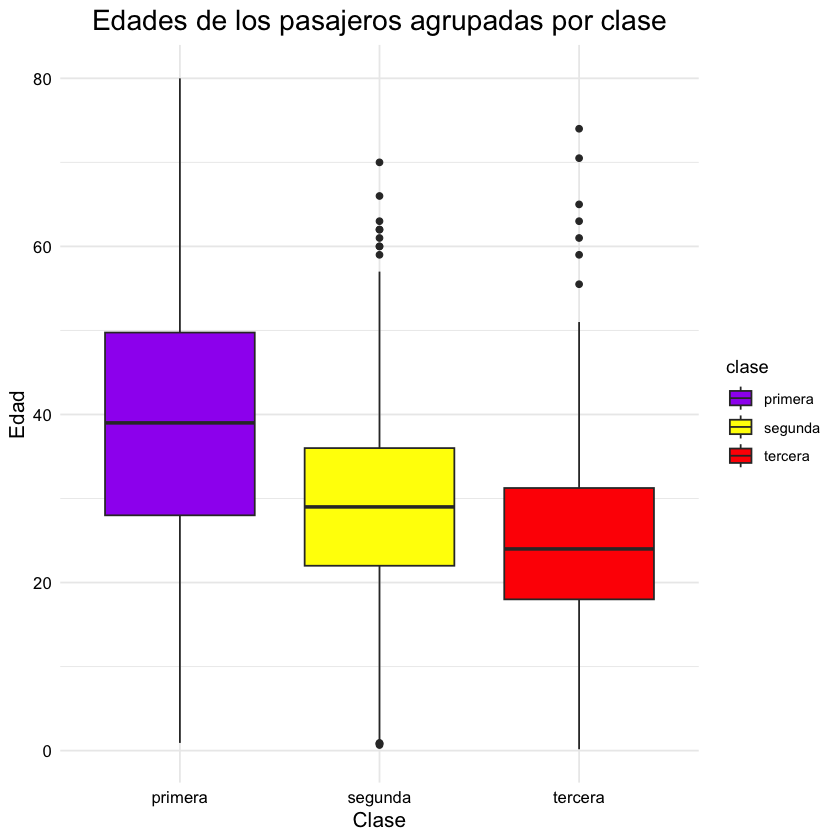

In [14]:
ggplot(titanic, aes(x = clase, y = edad, fill = clase)) +
  geom_boxplot() +
  labs(title = "Edades de los pasajeros agrupadas por clase", x = "Clase", y = "Edad") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size=17),  # Centrar el título
    axis.text = element_text(color = "black", size=10),  # Hacer los textos de los ejes más opacos
    axis.title = element_text(color = "black", size=12.5)  # Hacer los títulos de los ejes más opacos
  ) +
  scale_fill_manual(values = c("primera" = "purple", "segunda" = "yellow", "tercera" = "red"))  # Colores personalizados

14. Calcula la media y la varianza de las edades en cada clase.

In [15]:
media_edad_primera <- mean(titanic$edad[titanic$clase == "primera"], na.rm = TRUE)
varianza_edad_primera <- var(titanic$edad[titanic$clase == "primera"], na.rm = TRUE)
std_edad_primera <- sd(titanic$edad[titanic$clase == "primera"], na.rm = TRUE)

media_edad_segunda <- mean(titanic$edad[titanic$clase == "segunda"], na.rm = TRUE)
varianza_edad_segunda <- var(titanic$edad[titanic$clase == "segunda"], na.rm = TRUE)
std_edad_segunda <- sd(titanic$edad[titanic$clase == "segunda"], na.rm = TRUE)

media_edad_tercera <- mean(titanic$edad[titanic$clase == "tercera"], na.rm = TRUE)
varianza_edad_tercera <- var(titanic$edad[titanic$clase == "tercera"], na.rm = TRUE)
std_edad_tercera <- sd(titanic$edad[titanic$clase == "tercera"], na.rm = TRUE)

# Imprimir los resultados
cat("Primera clase - Media de edad:", media_edad_primera, ", Varianza de edad:", varianza_edad_primera, ", Desviación std de edad:", std_edad_primera, "\n")
cat("Segunda clase - Media de edad:", media_edad_segunda, ", Varianza de edad:", varianza_edad_segunda, ", Desviación std de edad:", std_edad_segunda, "\n")
cat("Tercera clase - Media de edad:", media_edad_tercera, ", Varianza de edad:", varianza_edad_tercera, ", Desviación std de edad:", std_edad_tercera, "\n")

Primera clase - Media de edad: 39.08304 , Varianza de edad: 211.2852 , Desviación std de edad: 14.53565 
Segunda clase - Media de edad: 29.5067 , Varianza de edad: 186.0122 , Desviación std de edad: 13.63863 
Tercera clase - Media de edad: 24.745 , Varianza de edad: 140.7283 , Desviación std de edad: 11.8629 


15. En el barco se proporcionaba asistencia especial al 5% de los pasajeros de mayor edad. ¿Qué edad
debía tener un pasajero para recibir asistencia especial? ¿Qué edad tenía el pasajero más mayor?

In [16]:
edad_percentil_95 <- quantile(titanic$edad, 0.95, na.rm = TRUE)
edad_maxima <- max(titanic$edad, na.rm = TRUE)

cat("Edad mínima para recibir asistencia especial (percentil 95):", edad_percentil_95, "\n")
cat("Edad del pasajero más mayor:", edad_maxima, "\n")

Edad mínima para recibir asistencia especial (percentil 95): 56 
Edad del pasajero más mayor: 80 


16. Dibuja un histograma para el precio del pasaje en primera clase.

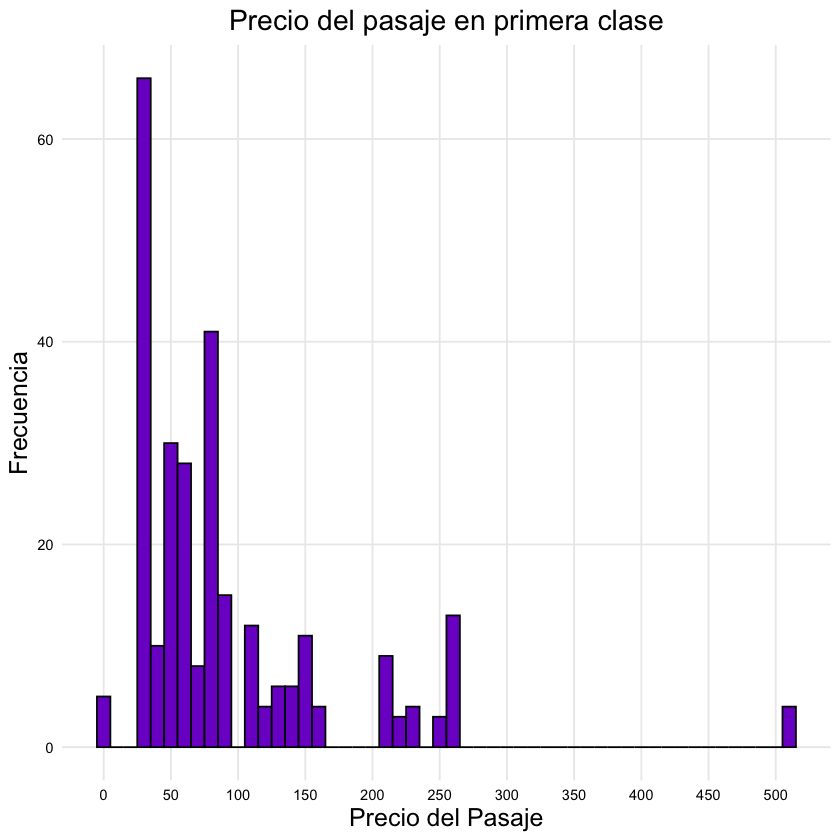

In [17]:
primera_clase <- subset(titanic, clase == "primera")

# Crear un histograma del precio del pasaje en primera clase
ggplot(primera_clase, aes(x = tarifa)) +
  geom_histogram(binwidth = 10, fill = "purple3", color = "black") +
  labs(title = "Precio del pasaje en primera clase", x = "Precio del Pasaje", y = "Frecuencia") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size=17),  # Centrar el título
    panel.grid.minor = element_blank(),  # Quitar la cuadrícula menor
    axis.text = element_text(color = "black"),  # Hacer los textos de los ejes más opacos y más grandes
    axis.title = element_text(color = "black", size = 15)  # Hacer los títulos de los ejes más opacos y más grandes
  ) + 
  scale_x_continuous(breaks = seq(0, max(primera_clase$tarifa, na.rm = TRUE), by = 50))

17. ¿Cuál es la moda para el puerto de embarque?

In [18]:
moda_puerto <- names(which.max(table(titanic$embarque)))
cat("La moda para el puerto de embarque es:", moda_puerto, "\n")

La moda para el puerto de embarque es: Southampton 


18. Los pasajeros que pagaban menos por su billete debían dormir en los camarotes más modestos del barco.
En concreto, el 5% de los pasajeros que menos pagaban viajaban en dichos camarotes. ¿Cuál era el
precio máximo que se pagaba por uno de estos camarotes?

In [19]:
precio_modesto <- quantile(titanic$tarifa, 0.05, na.rm = TRUE)
cat("El precio máximo que se pagaba por uno de los camarotes más modestos es:", precio_modesto, "\n")

El precio máximo que se pagaba por uno de los camarotes más modestos es: 7.2292 


19. Construye una tabla de contingencia para la distribución de la clase del pasajero por sexo.

In [20]:
tabla_contingencia <- table(titanic$clase, titanic$sexo)
tabla_contingencia

         
          hombre mujer
  primera    151   131
  segunda    158   103
  tercera    348   152

20. Representa en un mismo gráfico la distribución de la clase del pasajero por sexo.

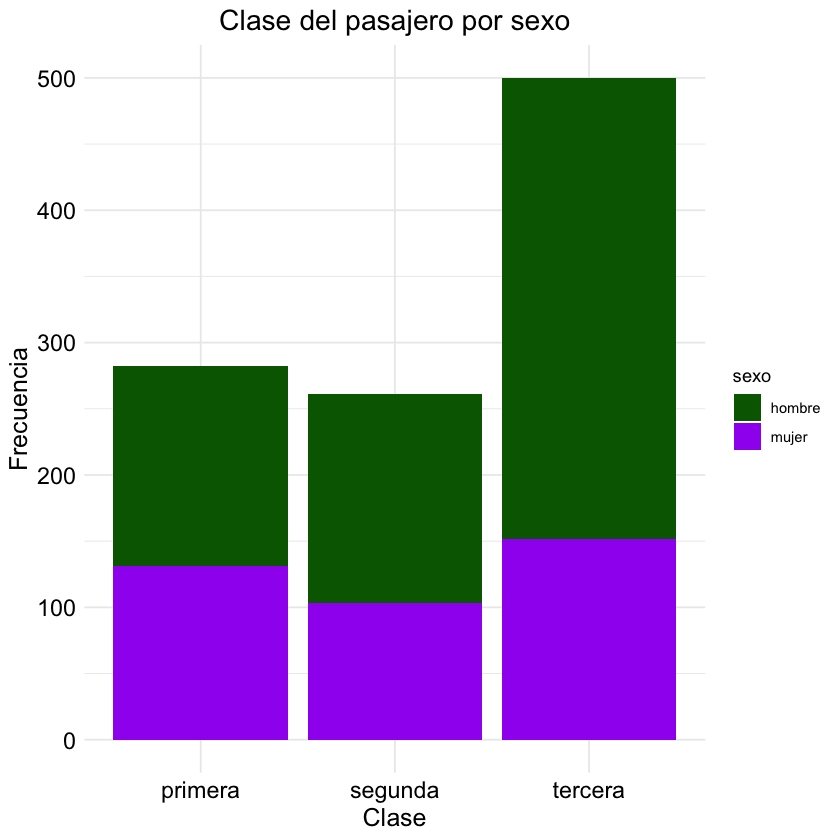

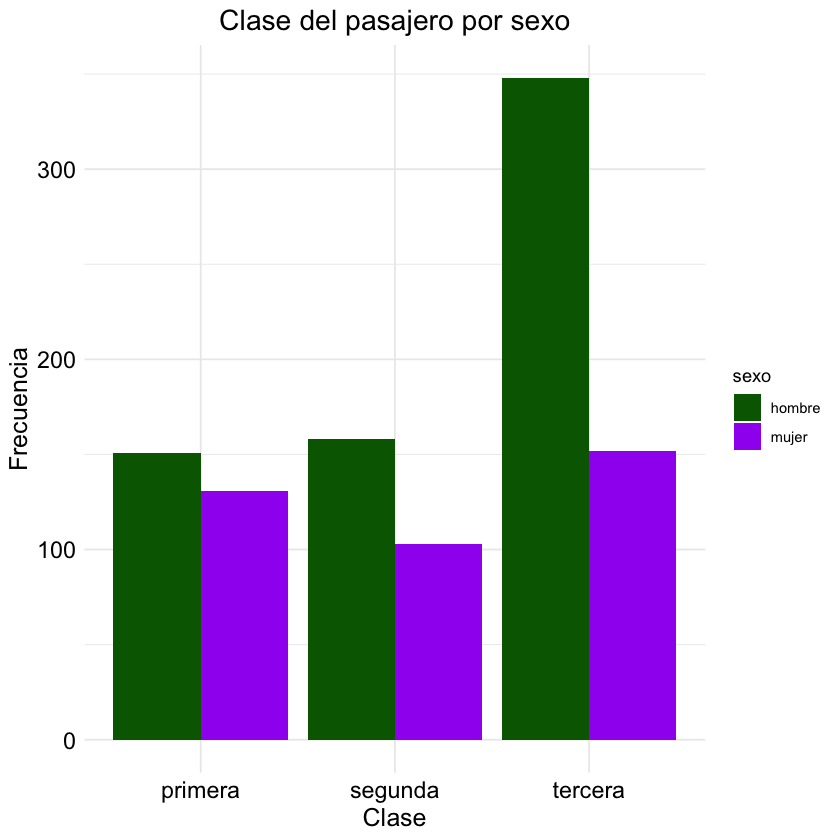

In [21]:
ggplot(titanic, aes(x = clase, fill = sexo)) +
  geom_bar(position = "stack") + # barras apiladas
  labs(title = "Clase del pasajero por sexo", x = "Clase", y = "Frecuencia") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 17),  # Centrar el título y hacerlo más grande
    axis.text = element_text(color = "black", size = 14),  # Hacer los textos de los ejes más grandes
    axis.title = element_text(color = "black", size = 15)  # Hacer los títulos de los ejes más grandes
  ) +
  scale_fill_manual(values = c("hombre" = "darkgreen", "mujer" = "purple"))



ggplot(titanic, aes(x = clase, fill = sexo)) +
  geom_bar(position = "dodge") + # barras agrupadas
  labs(title = "Clase del pasajero por sexo", x = "Clase", y = "Frecuencia") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 17),  # Centrar el título y hacerlo más grande
    axis.text = element_text(color = "black", size = 14),  # Hacer los textos de los ejes más grandes
    axis.title = element_text(color = "black", size = 15)  # Hacer los títulos de los ejes más grandes
  ) +
  scale_fill_manual(values = c("hombre" = "darkgreen", "mujer" = "purple"))  # Colores personalizados

21. Calcula los cuartiles para la edad.

In [22]:
cuartiles_edad <- quantile(titanic$edad, probs = c(0.25, 0.5, 0.75), na.rm = TRUE)
print(cuartiles_edad)

25% 50% 75% 
 21  28  39 


22. ¿Pagaban billete los menores de un año?

In [23]:
menores_uno <- subset(titanic, edad < 1)
pagaban_billete <- any(menores_uno$tarifa > 0, na.rm = TRUE)

if (pagaban_billete) {
  cat("Sí, algunos menores de un año pagaban billete.\n")
} else {
  cat("No, ningún menor de un año pagaba billete.\n")
}

Sí, algunos menores de un año pagaban billete.
